In [1]:
# 📘 Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [5]:
# 📘 Step 2: Load the dataset
df = pd.read_csv("diabetes.csv")

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape of dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# 📘 Step 3: Explore the dataset
print("\nDataset Information:")
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nSummary statistics:")
df.describe()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values in each column:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

Summary statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# 📘 Step 4: Define Features (X) and Target (y)
X = df.drop(columns=['Outcome'])   # All independent features
y = df['Outcome']                  # Target column (0 = No Diabetes, 1 = Diabetes)

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (768, 8)
Target shape: (768,)


In [11]:
# 📘 Step 5: Split the dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (614, 8)
Testing set shape: (154, 8)


In [13]:
# 📘 Step 6: Normalize (Standardize) the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data normalization completed!")


✅ Data normalization completed!


In [15]:
# 📘 Step 7: Build and Train the KNN Model
k = 5  # Number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

print(f"✅ KNN Model trained successfully (k = {k})")


✅ KNN Model trained successfully (k = 5)


In [17]:
# 📘 Step 8: Make Predictions
y_pred = knn.predict(X_test_scaled)

print("Sample Predictions:", y_pred[:10])


Sample Predictions: [1 0 0 0 0 0 0 1 0 1]


In [19]:
# 📘 Step 9: Evaluate Model Performance
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy, Error Rate, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\n--- Model Evaluation Metrics ---")
print("Confusion Matrix:\n", cm)
print(f"Accuracy     : {accuracy*100:.2f}%")
print(f"Error Rate   : {error_rate*100:.2f}%")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")



--- Model Evaluation Metrics ---
Confusion Matrix:
 [[80 20]
 [26 28]]
Accuracy     : 70.13%
Error Rate   : 29.87%
Precision    : 0.5833
Recall       : 0.5185


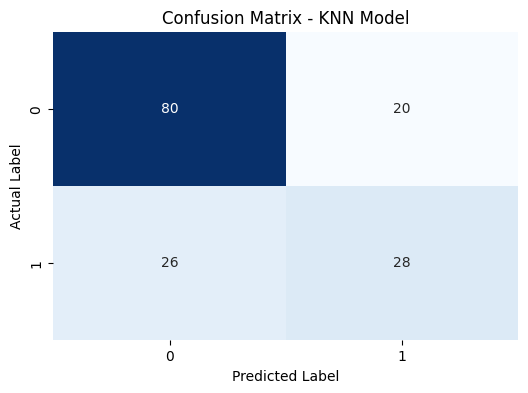

In [21]:
# 📘 Step 10: Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - KNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


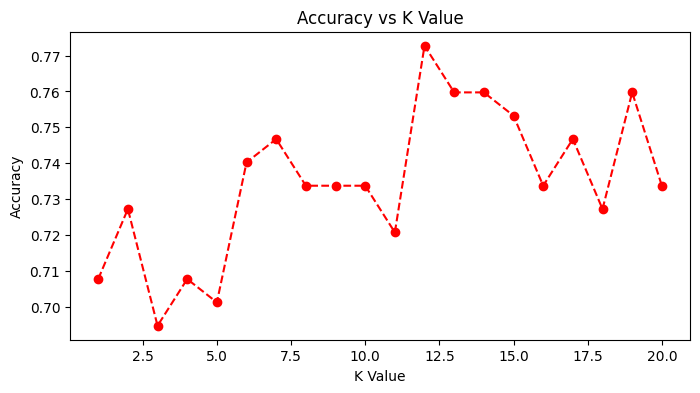

✅ Best accuracy achieved at k = 12 with accuracy = 77.27%


In [23]:
# 📘 Step 11: Tune k (Find the best value of k)
accuracy_scores = []

for i in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=i)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred_temp))

plt.figure(figsize=(8,4))
plt.plot(range(1,21), accuracy_scores, color='red', marker='o', linestyle='dashed')
plt.title("Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

best_k = np.argmax(accuracy_scores) + 1
print(f"✅ Best accuracy achieved at k = {best_k} with accuracy = {max(accuracy_scores)*100:.2f}%")
